In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from utils.explore import *

In [3]:
%ls data

h1b_kaggle.csv                 titanic-train.csv
titanic-gender-submission.csv  uber/
titanic-test.csv


In [4]:
tt_trn = pd.read_csv("data/titanic-train.csv")

## Exploring the dataset

In [5]:
tt_trn.shape

(891, 12)

In [6]:
tt_trn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
tt_trn.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
categorical = tt_trn.dtypes[tt_trn.dtypes == "object"].index
tt_trn[categorical].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## Questions to ask

1. Do I need all of the variables?
2. Should I transform any variables?
3. Are there nulls or outliers?
4. Should I create new variables?

### Run show_qual

In [9]:
show_qual(tt_trn)

Name
                                                   Count Frequency
Graham, Mr. George Edward                              1  0.112233
Elias, Mr. Tannous                                     1  0.112233
Madill, Miss. Georgette Alexandra                      1  0.112233
Cumings, Mrs. John Bradley (Florence Briggs Tha...     1  0.112233
Beane, Mrs. Edward (Ethel Clarke)                      1  0.112233
...                                                  ...       ...
Gill, Mr. John William                                 1  0.112233
Alhomaki, Mr. Ilmari Rudolf                            1  0.112233
Mellors, Mr. William John                              1  0.112233

Sex
        Count  Frequency
male      577  64.758698
female    314  35.241302

Ticket
            Count Frequency
CA. 2343        7  0.785634
347082          7  0.785634
1601            7  0.785634
347088          6  0.673401
CA 2144         6  0.673401
...           ...       ...
315088          1  0.112233
349215       

## 1. Do I need all of the variables?

In [10]:
del tt_trn["PassengerId"]
del tt_trn["Ticket"]

## 2. Should I transform any variables?

In [11]:
new_survived = pd.Categorical(tt_trn["Survived"])
new_survived = new_survived.rename_categories(["Died", "Survived"])
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [12]:
tt_trn = convert_to_categories(
    tt_trn, 
    column="Pclass", 
    categories=["Class1", "Class2", "Class3"]
)

In [13]:
tt_trn["Cabin"].unique()[:9]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27'], dtype=object)

In [14]:
cabin_str = tt_trn["Cabin"].astype(str)
new_cabin = np.array([cabin[0] for cabin in cabin_str])
pd.Categorical(new_cabin).describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [15]:
tt_trn["Cabin"] = pd.Categorical(new_cabin)

## 3. Are there nulls or outliers?

In [16]:
show_column_nulls(tt_trn)

,Null Frequency
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,0.000000
Embarked,0.002245


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10daa8410>]], dtype=object)

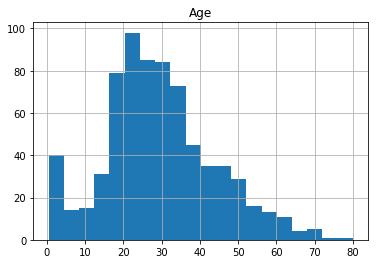

In [17]:
tt_trn.hist(column="Age", bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10df12b50>]], dtype=object)

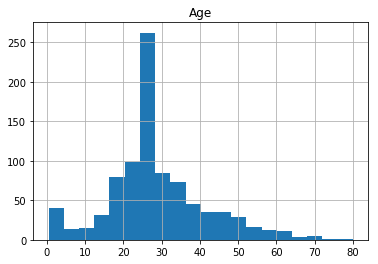

In [18]:
tt_trn = impute_with_median(tt_trn, column="Age")
tt_trn.hist(column="Age", bins=20)

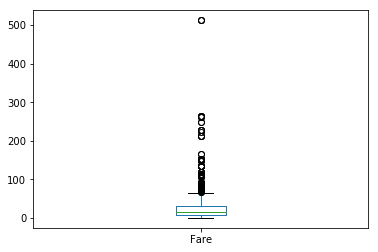

In [19]:
tt_trn["Fare"].plot(kind="box")

In [20]:
tt_trn.loc[np.where(tt_trn["Fare"] == tt_trn["Fare"].max())]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


## 4. Should I create new variables?

In [21]:
tt_trn["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
tt_trn["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
tt_trn["Family"] = tt_trn["SibSp"] + tt_trn["Parch"]

In [24]:
tt_trn.loc[np.where(tt_trn["Family"] == tt_trn["Family"].max())]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10
